# Visualize Simulated Boycott Results

In [891]:
from collections import defaultdict, OrderedDict
import json

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid")
sns.set_color_codes("dark")

from scipy import stats
from scipy.interpolate import interp1d

# http://files.grouplens.org/datasets/movielens/ml-1m-README.txt
NUM_USERS = 6040
NUM_RATINGS = 1000209

In [892]:
NORMALIZE = True

First things first: let's load our master data file (a single, aggregated csv).

In [893]:
df = pd.read_csv('all_results.csv', dtype={'indices': str})
df = df[df.ratingfrac.notna()]

Let's apply transformation that will affect the entire dataframe.
1. Calculate the number of users included in each experiment.

In [894]:
df = df.assign(num_users_boycotting = [(NUM_USERS - int(x))/NUM_USERS for x in df.num_users])
df = df.assign(num_ratings_missing = [NUM_RATINGS - int(x) for x in df.num_ratings])
df = df.assign(nrm_rounded = [round(x, -5) for x in df.num_ratings_missing])
# df = df.assign(user_boycott_frac = [x / NUM_USERS for x in df.num_users_boycotting])


# drop columns we're not going to use.
drops = [
    #'tail',
    'vanilla',
]
for column in df.columns.values:
    for drop in drops:
        if drop in column:
            df = df.drop(column, axis=1)

# old_df = old_df.assign(num_users_boycotting = [NUM_USERS - int(x) for x in old_df.num_users])

# EDIT ME
Define all the lists that can be used throughout. By editing this cell we can easily modify the full notebook.

In [895]:
id_vars = ['name','algo_name', 'indices', 'ratingfrac', 'userfrac', 'num_ratings', 'num_users', 'num_users_boycotting']
id_vars = [x for x in id_vars if x in list(df.columns.values)]
metrics = [
    #'rmse',
    'ndcg10',
    #'tailndcg10',
    #'ndcg5',
    #'tailndcg5',
    #'ndcgfull',
    #'tailndcgfull',
    #'ndcgfull',
    #'prec10t4',
    #'tailprec10t4',
    #'prec5t4',
    #'tailprec5t4',
]

# don't define it up here that's just confusing.

organized_experiments = [
    'gender', 'age', 
    'occupation', 'power', 'genre',
    # 'genre_strict', 'state',
]
algo_names = [
    'KNNBaseline_item_msd',
    'SVD'
]
standard_algo_names = [
    'KNNBaseline_item_msd', 'SVD', 'GlobalMean',
    'MovieMean', 'GuessThree',
    'KNNBasic_user_msd',
    'KNNBasic_item_msd',
]
standard_results = {}
algo_to_metric_vs_global_mean = defaultdict(dict)
algo_to_metric_vs_movie_mean = defaultdict(dict)
algo_to_metric_vs_guess_three = defaultdict(dict)
algo_to_metric_vs_knn = defaultdict(dict)
algo_to_metric_vs_user = defaultdict(dict)
algo_to_metric_vs_knnbasicitem = defaultdict(dict)

for algo_name in standard_algo_names:
    try:
        filename_ratingcv_standards = 'standard_results/{}_ratingcv_standards_for_{}_10.json'.format(
            'ml-1m', algo_name)
        with open(filename_ratingcv_standards, 'r') as f:
            standard_results[algo_name] = json.load(f)
    except:
        filename_ratingcv_standards = 'standard_results/{}_ratingcv_standards_for_{}.json'.format(
            'ml-1m', algo_name)
        with open(filename_ratingcv_standards, 'r') as f:
            standard_results[algo_name] = json.load(f)
for main_algo_name in algo_names:
    for metric in metrics:
        goodval = standard_results[main_algo_name].get(metric, 0)
        print('goodval', goodval)
        gmean = standard_results['GlobalMean'][metric]
        mmean = standard_results['MovieMean'].get(metric, 0)
        guess_three = standard_results['GuessThree'][metric]
        knn = standard_results['KNNBaseline_item_msd'][metric]
        userval = standard_results['KNNBasic_user_msd'][metric]
        knnbasicitem = standard_results['KNNBasic_item_msd'][metric]
        
        algo_to_metric_vs_global_mean[main_algo_name][metric] = (gmean - goodval) / goodval * 100 if goodval else 0
        algo_to_metric_vs_movie_mean[main_algo_name][metric] = (mmean - goodval) / goodval * 100 if goodval else 0
        algo_to_metric_vs_guess_three[main_algo_name][metric] = (guess_three - goodval) / goodval * 100 if goodval else 0
        algo_to_metric_vs_knn[main_algo_name][metric] = (knn - goodval) / goodval * 100 if goodval else 0
        algo_to_metric_vs_user[main_algo_name][metric] = (userval - goodval) / goodval * 100 if goodval else 0
        algo_to_metric_vs_knnbasicitem[main_algo_name][metric] = (knnbasic_item - goodval) / goodval * 100 if goodval else 0

print(algo_to_metric_vs_user)
print('movie', algo_to_metric_vs_movie_mean)
print('standards', standard_results['SVD'])


goodval 0.7915010747294138
goodval 0.7932274802085224
defaultdict(<class 'dict'>, {'KNNBaseline_item_msd': {'ndcg10': -1.5297336566628477}, 'SVD': {'ndcg10': -1.7440474715343823}})
movie defaultdict(<class 'dict'>, {'KNNBaseline_item_msd': {'ndcg10': -2.28498443923114}, 'SVD': {'ndcg10': -2.4976545023143673}})
standards {'mae': 0.685967676749731, 'ndcg10': 0.7932274802085224, 'ndcg10_frac': 0.7248356015942885, 'ndcg10_frac_all': 0.7248356015942885, 'ndcg5': 0.784759119118535, 'ndcg5_frac': 0.9247887139228076, 'ndcg5_frac_all': 0.9247887139228076, 'ndcgfull': 0.9094999180478388, 'ndcgfull_frac': 1.0, 'ndcgfull_frac_all': 1.0, 'prec10t4': 0.8035308395114538, 'prec10t4_frac': 0.9916164172402862, 'prec10t4_frac_all': 0.9916164172402862, 'prec5t4': 0.8304700496292359, 'prec5t4_frac': 0.9916164172402862, 'prec5t4_frac_all': 0.9916164172402862, 'rec10t4': 0.639542870708601, 'rec10t4_frac': 0.9916164172402862, 'rec10t4_frac_all': 0.9916164172402862, 'rec5t4': 0.4414890460548889, 'rec5t4_frac':

In [896]:
algo_to_metric_vs_movie_mean

defaultdict(dict,
            {'KNNBaseline_item_msd': {'ndcg10': -2.28498443923114},
             'SVD': {'ndcg10': -2.4976545023143673}})

In [897]:
samples_df = df[df['type'] == 'sample_users']
if not samples_df.empty:
    print(samples_df[['name', 'num_users', 'num_users_boycotting']].head())
org_df = df[df['type'].isin(organized_experiments)]

                  name  num_users  num_users_boycotting
3536  1208 user sample       4832                   0.2
3538  1208 user sample       4832                   0.2
3539  1208 user sample       4832                   0.2
3541  1208 user sample       4832                   0.2
3542  1208 user sample       4832                   0.2


In [898]:
org_df.name = [
    x.replace('excluded', '')
    .replace('users from', '')
#     .replace('US_', '')
#     .replace('state', '')
    .replace('using threshold 4', '')
    .replace('Top 10% contributors', 'power users')
    .strip()
    .lower()
    for x in list(org_df.name)
]

C:\Users\Nick\Anaconda3\lib\site-packages\pandas\core\generic.py:3643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [899]:
# for algo_name in algo_names:
#     filt = org_df[org_df.algo_name == algo_name]
#     for metric in metrics:
#         key = 'percent_increase_{}_non-boycott'.format(metric)
#         sns.jointplot(filt.num_ratings, y=filt[key], kind="reg").fig.suptitle(algo_name)
#         plt.show()
#         slope, intercept, r_value, p_value, std_err = stats.linregress(filt.num_ratings, y=filt[key])
#         print(slope, intercept, r_value, p_value)
#         algo_to_metric_to_slope[algo_name][metric] = slope
#         algo_to_metric_to_intercept[algo_name][metric] = intercept
        
#         # calculate the average error for all boycott users in each dataframe
#         algo_to_metric_to_average_boycott[algo_name][metric] = np.mean(
#             samples_df[(
#                 (samples_df.algo_name == algo_name) &
#                 (samples_df.userfrac == 1.0) & 
#                 (samples_df.ratingfrac == 1.0)
#             )][key.replace('non-boycott', 'boycott')]
#         )

In [900]:
def select_cols(cols, metrics, groups, percents):
    """take a list of cols and filter based on metrics/groups/percents"""
    increase_cols = [
        x for x in cols if 'increase' in x and (any(metric == x.split('_')[-2] for metric in metrics))
    ]
    increase_cols = [
        x for x in increase_cols if any(group == x.split('_')[-1] for group in groups)
    ]
    if percents:
        increase_cols = [x for x in increase_cols if 'percent' in x]
    else:
        increase_cols = [x for x in increase_cols if 'percent' not in x]
    return increase_cols

In [901]:
def fill_in_longform(df):
    """Fill in a longform dataframe with metric, group, and name information"""
    df = df.assign(
        metric=[x.split('_')[-2] for x in df.increase_type]
    )
    df = df.assign(
        group=[x.split('_')[-1] for x in df.increase_type]
    )
    return df
    

In [902]:
palette={'all': 'b', 'non-boycott': 'g'}
TITLE = 'Effect of Boycott Size on Recommender Performance'
YLABEL = 'nDCG@10 personalization factor'

In [1023]:
def p_b_curve(
        df, metrics, groups, percents=False,
        reg_plot=False, hue='group', row='metric',
        save=False
    ):
    # so we can modify without fear
    
    algo_names = list(set(df.algo_name))
    df = df.copy()
    algo_to_metric_to_group_to = defaultdict(lambda: defaultdict(lambda: defaultdict(dict)))

    increase_cols = select_cols(list(df.columns.values), metrics, groups, percents)
    increase_cols = [x for x in increase_cols if 'vanilla' not in x]
    if NORMALIZE:
        for metric in metrics:
            for algo_name in algo_names:
                movie_val = abs(algo_to_metric_vs_movie_mean[algo_name][metric])
                for increase_col in increase_cols:
                    if increase_col.split('_')[-2] == metric:
                        df.loc[df.algo_name == algo_name, increase_col] /= movie_val
    
    longform = df[increase_cols + id_vars].melt(
        id_vars = id_vars,
        var_name='increase_type'
    )
    longform = fill_in_longform(longform)


    grid = sns.lmplot(
        x="num_users_boycotting", y="value", hue=hue, data=longform,
        sharey='row', sharex='col',
        size=4, 
        row=row, col='algo_name',
        fit_reg=False,
        x_estimator=np.mean, ci=99,
        palette=palette,
        legend_out=True,
    )
    
    if NORMALIZE:
        grid.set(ylim=(-1.6, 0.1))

    algo_to_size_to_decreases = defaultdict(lambda: defaultdict(list))
    for metric in metrics:
        for algo_name in algo_names:
            filt = df[df.algo_name == algo_name]
            for group in groups:
                key = 'increase_{}_{}'.format(metric, group)
                if percents:
                    key = 'percent_' + key
                x = filt.num_users_boycotting
                user_nums = sorted(list(set(filt.num_users_boycotting)))
                nrm_rounded = sorted(list(set(filt.nrm_rounded)))
                y = filt[key]

                num_to_mean = OrderedDict()
                for num_users_boycotting in user_nums:
                    filt_by_name = filt[filt.num_users_boycotting == num_users_boycotting]
                    # print('1', len(filt_by_name[key]))
                    num_to_mean[num_users_boycotting] = np.mean(filt_by_name[key])
                nrm_rounded_to_mean = OrderedDict()
                for num in nrm_rounded:
                    filt_by_nrm = filt[filt.nrm_rounded == num]
                    nrm_rounded_to_mean[num] = np.mean(filt_by_nrm[key])

                if group == 'non-boycott':
                    for num in [
                        0.1, 0.3,
                    ]:
                        print(num_to_mean)
                        val_nb = num_to_mean[num]
                        val_all = np.mean(filt[filt.num_users_boycotting == num][key.replace('non-boycott', 'all')])
                        ratio_nb = val_nb / algo_to_metric_vs_movie_mean[algo_name][metric]
                        ratio_all = val_all / algo_to_metric_vs_movie_mean[algo_name][metric]
                        print(
                            'Algo:{}  |  Metric:{}  |  #users:{}'.format(
                                algo_name, metric, num, 
                            )
                        )
                        print('NB Val:{}  |  NB Ratio:{}'.format(
                            val_nb,
                            ratio_nb
                        ))
                        print('all Val:{}  |  all Ratio:{}'.format(
                            val_all,
                            ratio_all,
                        ))
                        algo_to_size_to_decreases[algo_name][num].append(ratio_nb)
                meany = np.array(list(num_to_mean.values()))
                meany_ratings = np.array(list(nrm_rounded_to_mean.values()))

                algo_to_metric_to_group_to[algo_name][metric][group]['x'] = user_nums
                algo_to_metric_to_group_to[algo_name][metric][group]['y'] = meany

                #smoothf = interp1d(user_nums, meany, kind='linear', bounds_error=False, fill_value='extrapolate')
                smoothf_ratings = interp1d(nrm_rounded, meany_ratings, kind='quadratic', bounds_error=False, fill_value='extrapolate')

                #algo_to_metric_to_group_to[algo_name][metric][group]['interp'] = smoothf
                algo_to_metric_to_group_to[algo_name][metric][group]['interp_ratings'] = smoothf_ratings

                algo_to_metric_to_group_to[algo_name][metric][group]['max_user_units'] = max(user_nums)
                #xnew = np.linspace(min(user_nums), max(user_nums), num=1000)
                algo_to_metric_to_group_to[algo_name][metric][group]['xnew_ratings'] = np.linspace(
                    min(filt.num_ratings_missing), max(filt.num_ratings_missing), num=1000)

    for x in grid.facet_data():
        i_row, i_col, i_hue = x[0]
        metric = grid.row_names[i_row]
        algo_name = grid.col_names[i_col]
        group = grid.hue_names[i_hue]
        
        zero_line = 0
        movie_val = abs(algo_to_metric_vs_movie_mean[algo_name][metric])
        knnbaseline_line = algo_to_metric_vs_knn[algo_name][metric]
        knnbasicitem_line = algo_to_metric_vs_knnbasicitem[algo_name][metric]
        useruser_line = algo_to_metric_vs_user[algo_name][metric]
        movie_val = -1 * algo_to_metric_vs_movie_mean[algo_name][metric]
        movie_line = algo_to_metric_vs_movie_mean[algo_name][metric]
        if NORMALIZE:
            knnbaseline_line /= movie_val
            knnbasicitem_line /= movie_val
            useruser_line /= movie_val
            movie_line /= movie_val
        
        ax = grid.axes[i_row, i_col]
#         print(algo_to_metric_to_group_to[algo_name][metric][group]['x'])
#         print(algo_to_metric_to_group_to[algo_name][metric][group]['y'])
        print(algo_name, metric, group)
    
        linestyle = '-'
        if group == 'all':
            linestyle = '--'
        ax.plot(
            algo_to_metric_to_group_to[algo_name][metric][group]['x'],
            algo_to_metric_to_group_to[algo_name][metric][group]['y'],
            linestyle=linestyle, color=grid._colors[i_hue]
        )
        if not save:
            xnew_ratings = algo_to_metric_to_group_to[algo_name][metric][group]['xnew_ratings']
            ynew_ratings = algo_to_metric_to_group_to[algo_name][metric][group]['interp_ratings'](xnew_ratings)
            ax.plot(
                xnew_ratings * algo_to_metric_to_group_to[algo_name][metric][group]['max_user_units'] / NUM_RATINGS,
                ynew_ratings, '-')
            
        ax.axhline(0, color='0.3', linestyle='-')
        ax.axhline(movie_line, color='0.3', linestyle='-')
        plt.setp(ax.get_xticklabels(), visible=True, rotation=45)
        if algo_name == 'SVD':
            #ax.text(0.7, knnbaseline_line+0.05, 'Item KNN + Baselines: 2010')
            ax.axhline(knnbaseline_line, color='y', linestyle=':')
            #ax.text(0.7, knnbasicitem_line+0.05, 'Item KNN (1999)')
            ax.axhline(knnbasicitem_line, color='r', linestyle=':')
            ax.axhline(useruser_line, color='c', linestyle=':')
            #ax.text(0.7, useruser_line+0.05, 'User KNN (1994)')
    plt.subplots_adjust(hspace=0.2)
#     for metric in metrics:
#         for algo_name in algo_names
    algo_to_size_to_mean_dec = defaultdict(dict)
    for algo_name, size2dec in algo_to_size_to_decreases.items():
        for size, decs in size2dec.items():
            algo_to_size_to_mean_dec[algo_name][size] = np.mean(decs)
    print('=====\nSize to Mean Decrease')
    print(algo_to_size_to_mean_dec)
                   
    grid.set_xlabels('Fraction of users boycotting')
    grid.set_ylabels(YLABEL)
    if save:
        new_labels = ['All\nUsers', 'Not\nBoycotting\nUsers',]
        for t, l in zip(grid._legend.texts, new_labels): t.set_text(l)
        grid._legend.set_title('')
        grid.set_titles(TITLE)
        plt.savefig('sample.svg', bbox_inches='tight', dpi=300)
    return algo_to_metric_to_group_to

OrderedDict([(0.00016556291390728477, 0.026884278781292476), (0.0004966887417218543, 0.027065107952815706), (0.0009933774834437086, 0.04642896060713517), (0.004966887417218543, 0.014950090538997573), (0.009933774834437087, 0.002310105858823444), (0.05, -0.012934008463825588), (0.1, -0.05341757511676516), (0.2, -0.12117368668358547), (0.3, -0.2111139533889756), (0.4, -0.3198400962306301), (0.5, -0.45147057385257244), (0.6, -0.576842776804313), (0.7, -0.7840999972926325), (0.8, -1.0814114147869993), (0.9, -1.518175385101116), (0.9900662251655629, -3.7502749493304077)])
Algo:SVD  |  Metric:ndcg10  |  #users:0.1
NB Val:-0.05341757511676516  |  NB Ratio:0.02138709539981113
all Val:-0.15936387921237938  |  all Ratio:0.0638054138651724
OrderedDict([(0.00016556291390728477, 0.026884278781292476), (0.0004966887417218543, 0.027065107952815706), (0.0009933774834437086, 0.04642896060713517), (0.004966887417218543, 0.014950090538997573), (0.009933774834437087, 0.002310105858823444), (0.05, -0.01293

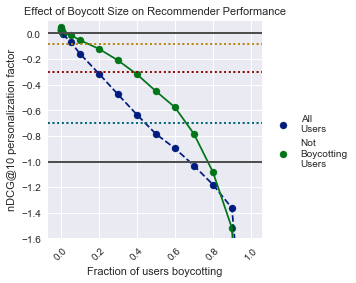

In [1024]:
_ = p_b_curve(
    samples_df[samples_df.algo_name == 'SVD'],
    metrics=['ndcg10', ],
    percents=True,
    groups=['non-boycott', 'all', ],
    save=True
)
plt.show()


In [ ]:
algo_to_metric_to_group_to = p_b_curve(
    samples_df,
    metrics=metrics,
    percents=True,
    groups=['non-boycott', 'all', ],
)

plt.show()

In [984]:
movie_val = -1 * algo_to_metric_vs_movie_mean['SVD']['ndcg10']
print(algo_to_metric_vs_knnbasicitem['SVD']['ndcg10']/movie_val)
for group in ['all', 'non-boycott']:
    found_item, found_user = False, False
    found_itembasic = False
    for x in range(0, NUM_RATINGS, NUM_RATINGS//10000):
        y = algo_to_metric_to_group_to['SVD']['ndcg10'][group]['interp_ratings'](x)
        #print(x, y)
        
        if not found_item:
            if y <= algo_to_metric_vs_knn['SVD']['ndcg10']/movie_val:
                print(group + ' found item:')
                print(x/NUM_RATINGS)
                found_item = True
        if not found_user:
            if y <= algo_to_metric_vs_user['SVD']['ndcg10']/movie_val:
                print(group + ' found user')
                print(x/NUM_RATINGS)
                found_user = True
        if not found_itembasic:
            if y <= algo_to_metric_vs_knnbasicitem['SVD']['ndcg10']/movie_val:
                print(group + ' found knnbasicitem')
                print(x/NUM_RATINGS)
                found_itembasic = True

-0.3015367441585257
all found item:
0.07348464170988263
all found knnbasicitem
0.19235979680246829
all found user
0.4403079756330927
non-boycott found item:
0.15906675504819492
non-boycott found knnbasicitem
0.3848195727093038
non-boycott found user
0.6649610231461625


In [907]:
def half_users(df):
    return df[(
        (df.userfrac == 0.5) & (df.ratingfrac == 1.0) 
        #& (df.algo_name == 'SVD')
    )]

In [908]:
def half_ratings(df):
    return df[(
        (df.userfrac == 1.0) & (df.ratingfrac == 0.5)
    )]

In [909]:
def all_users_all_ratings(df):
    return df[(
        (df.userfrac == 1.0) & (df.ratingfrac == 1.0)
    )]

In [910]:
normed_org_df = org_df.copy()
for metric in metrics:
    for algo_name in algo_names:
        movie_val = abs(algo_to_metric_vs_movie_mean[algo_name][metric])
        for group in ['non-boycott', 'like-boycott']:
            col = 'percent_increase_{}_{}'.format(metric, group)
            if NORMALIZE:
                normed_org_df.loc[
                    normed_org_df.algo_name == algo_name, col
                ] = org_df.loc[org_df.algo_name == algo_name, col] / movie_val
                
for metric in metrics:
    expec = []
    col = 'percent_increase_{}_expected'.format(metric)
    for i, row in normed_org_df.iterrows():
        x = row.num_ratings_missing
        expec.append(float(algo_to_metric_to_group_to[row.algo_name][metric]['non-boycott']['interp_ratings'](x)))
    kwargs = {col: expec}
    normed_org_df = normed_org_df.assign(**kwargs)

In [991]:
def plot2(
        df, metrics, groups,
        percents=False, kind='bar', size=4, flip=False, filename='tmp.svg', save=False,
        palette=None, aspect=1
    ):
    #df = input_df.copy()

    print('len of df', len(df.index))
    for name in list(set(df.name)):
        tmp = df[df.name == name].num_ratings_missing.mean()
        print(name)
        print(tmp)
        print(algo_to_metric_to_group_to['SVD']['ndcg10']['non-boycott']['interp_ratings'](tmp))
    increase_cols = select_cols(list(df.columns.values), metrics, groups, percents)
    increase_cols = [x for x in increase_cols if 'vanilla' not in x]
    longform = df[increase_cols + id_vars].melt(
        id_vars = id_vars,
        var_name='increase_type'
    )
    longform = fill_in_longform(longform)
    if flip:
        x = "name"
        y = "value"
    else:
        x = "value"
        y = "name"
    if '?' in filename:
        legend = False
    else:
        legend = True
    grid = sns.factorplot(
        x=x, y=y, hue="group", data=longform,
        size=size, kind=kind, col='algo_name', row='metric',
        sharex=False,
        row_order=metrics,
        legend=legend,
        legend_out=True,
        palette=palette,
        aspect=aspect
    )
    a = grid.axes
    
#     for metric in metrics:
#         for col in increase_cols:
#             if metric in col and 'expected' in col:
#                 expec = col
    
    name_to_ratios = defaultdict(list)
    diffs = defaultdict(list)
    name_to_counts = defaultdict(lambda: defaultdict(int))
    for x in grid.facet_data():
        i_row, i_col, i_hue = x[0]
        metric = grid.row_names[i_row]
        algo_name = grid.col_names[i_col]
        if grid.hue_names:
            group = grid.hue_names[i_hue]
        val = algo_to_metric_vs_movie_mean[algo_name][metric]
        
        
        if NORMALIZE:
            movie_val = abs(algo_to_metric_vs_movie_mean[algo_name][metric])
            val /= movie_val
        
        
        if flip:
            grid.axes[i_row, i_col].axhline(0, color='0.7', linestyle='-')
            #grid.axes[i_row, i_col].axhline(val, color='0.7', linestyle='-')
        else:
            grid.axes[i_row, i_col].axvline(0, color='0.7', linestyle='-')
            grid.axes[i_row, i_col].axvline(val, color='0.7', linestyle='-')
        
        for col in increase_cols:
            if metric == col.split('_')[-2]:
                if 'expected' in col:
                    expec = col
                elif 'non-boycott' in col:
                    nb = col
                elif 'like-boycott' in col:
                    lb = col
        for name in list(set(longform.name)):
            mask = (
                (longform.metric == metric) &
                (longform.algo_name == algo_name) &
                (longform.name == name)
            )
            
            masked = longform[mask]
            try:
                expec_arr = np.array(masked[masked.increase_type == expec].value)
                nb_arr = np.array(masked[masked.increase_type == nb].value)
                lb_arr = np.array(masked[masked.increase_type == lb].value)
                
                expec_mean = np.mean(expec_arr)
                nb_mean = np.mean(nb_arr)
                lb_mean = np.nanmean(lb_arr)
                
                ratio = nb_mean / expec_mean
                diff = nb_mean - expec_mean
                lb_diff = lb_mean - nb_mean
                pval = stats.ttest_ind(expec_arr, nb_arr, equal_var=False).pvalue
                #lb_vs_nb = stats.ttest_ind(lb_arr, nb_arr, equal_var=False).pvalue
                if True:# < 0.05:
                    pass
#                     if abs(ratio) >= 1.5 and diff < 0:
#                         print('Very effective...')
#                     elif abs(ratio) <= 0.67 and diff > 0:
#                         print('Very ineffective...')
#                     else:
#                         continue
                else:
                    continue
                
                name_to_counts[name]['total'] += 1
                
                print('{} {} {}, {}, {}'.format(metric, algo_name, name, expec, nb))
                print('Ratio: {}, pval: {}'.format(ratio, pval))
                name_to_ratios[name].append(ratio)
                diffs['nb'].append(lb_diff)
                diffs['lb'].append(lb_diff)
                name_to_counts[name]['total_sig'] += 1
                if diff >= 0:
                    name_to_counts[name]['total_less'] += 1
                else:
                    name_to_counts[name]['total_more'] += 1
                print(lb)
                print('lb info', lb_diff, lb_mean, nb_mean)
                if lb_diff < 0:
                    name_to_counts[name]['total_lbless'] += 1
            except Exception as err:
                print(err)
                print(algo_name, metric)
    total = 0
    total_sig = 0
    total_less = 0
    total_more = 0
    total_lbless = 0
    
    for name, counts in name_to_counts.items():
        total += counts['total']
        total_sig += counts['total_sig']
        total_less += counts['total_less']
        total_more += counts['total_more']
        total_lbless += counts['total_lbless']
#         print(name)
#         print('{} sig, {} less, and {} more out of {} total'.format(
#             counts['total_sig'], counts['total_less'],
#             counts['total_more'], counts['total'])
#         )
#         print('Mean:')
    print('Totals:')
    print('{} lbless, {} sig, {} less, and {} more out of {} total'.format(
            total_lbless, total_sig, total_less,
            total_more, total)
        )
    if save:
        new_labels = ['Users Similar\n to Boycotting\n Users', 'Not Boycotting\n Users', 'Expected']
        for t, l in zip(grid._legend.texts, new_labels): t.set_text(l)
        if 'h2' in filename:
            grid.set_ylabels("")
        else:
            grid.set_ylabels(YLABEL)
        grid.set_xlabels("")
        grid.set_titles("")
        plt.savefig(filename, size=(3, 3), bbox_inches='tight', dpi=300)
    return grid, (total, total_sig, total_less, total_more, total_lbless), diffs


In [992]:
normed_org_df = normed_org_df[normed_org_df.algo_name == 'SVD']

In [993]:
gender_boycotts = normed_org_df[normed_org_df['type'] == 'gender']
age_boycotts = normed_org_df[normed_org_df['type'] == 'age']
occupation_boycotts = normed_org_df[normed_org_df['type'] == 'occupation']
power_boycotts = normed_org_df[normed_org_df['type'] == 'power']
genre_boycotts = normed_org_df[normed_org_df['type'] == 'genre']

# removing these from contention
# genre_strict_boycotts = org_df[org_df['type'] == 'genre_strict']
# state_boycotts = org_df[org_df['type'] == 'state']

In [994]:
palette={'all': 'b', 'non-boycott': 'g', 'expected': 'y', 'like-boycott': 'c'}

def plot_all_three_scenarios(df, size=6):
    if False:
        all_df = all_users_all_ratings(df)
        if not all_df.empty:
            grid, (total, total_sig, total_less, total_more, total_lbless) = plot2(
                all_users_all_ratings(df),
                metrics=metrics,
                percents=True,
                groups=['all', 'non-boycott', 'expected'],
                size=size,
                palette=palette
            )
            grid.fig.suptitle('All Users, All Ratings')
            print('total1', total)
    else:
        total, total_sig, total_less, total_more, total_lbless = 0, 0, 0, 0, 0
    
    half_users_df = half_users(df)
    if not half_users_df.empty:
        grid, (total2, total_sig2, total_less2, total_more2, total_lbless2), ntd = plot2(
            half_users_df,
            metrics=metrics,
            percents=True,
            groups=['non-boycott', 'like-boycott', 'expected'],
            size=size,
            kind='bar',
            palette=palette
        )
        grid.fig.suptitle('Half Users')
        total += total2
        total_sig += total_sig2
        total_less += total_less2
        total_more += total_more2
        total_lbless += total_lbless2
        print('total2', total2, total)
        
#     half_ratings_df = half_ratings(df)
#     if not half_ratings_df.empty:
#         plot2(
#             half_ratings_df,
#             metrics=metrics,
#             percents=True,
#             groups=['non-boycott', 'boycott', 'like-boycott', 'expected'],
#             size=size,
#         ).fig.suptitle('Half Ratings')
#     plt.show()
    
    return (total, total_sig, total_less, total_more, total_lbless), ntd

In [995]:
running_totals = {
    'total': 0,
    'total_sig': 0,
    'total_less': 0,
    'total_more': 0,
    'total_lbless': 0
}
lbdiffs = []
diffs = []

# Make plots for paper here.

len of df 80
female users
124734.0
-0.059993512414410935
power users
190338.05
-0.11302769985665324
fans of film-noir
63147.6
-0.016559214068952215
male users
375947.55
-0.29115748811954834


C:\Users\Nick\Anaconda3\lib\site-packages\seaborn\categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


ndcg10 SVD female users, percent_increase_ndcg10_expected, percent_increase_ndcg10_non-boycott
Ratio: 0.6160046559005126, pval: 0.013040910971429799
percent_increase_ndcg10_like-boycott
lb info -0.018481621472703734 -0.05544490753163141 -0.03696328605892767
ndcg10 SVD power users, percent_increase_ndcg10_expected, percent_increase_ndcg10_non-boycott
Ratio: 1.6748878353682681, pval: 1.2790282191657302e-07
percent_increase_ndcg10_like-boycott
lb info -0.28887224849680154 -0.4781868632007346 -0.18931461470393307
ndcg10 SVD fans of film-noir, percent_increase_ndcg10_expected, percent_increase_ndcg10_non-boycott
Ratio: 3.257517102735211, pval: 2.487621635325052e-05
percent_increase_ndcg10_like-boycott
lb info -0.18599859814631137 -0.23996154790285948 -0.0539629497565481
ndcg10 SVD male users, percent_increase_ndcg10_expected, percent_increase_ndcg10_non-boycott
Ratio: 1.1214421607655032, pval: 0.01065906164058103
percent_increase_ndcg10_like-boycott
lb info -0.09246718700146117 -0.419063942

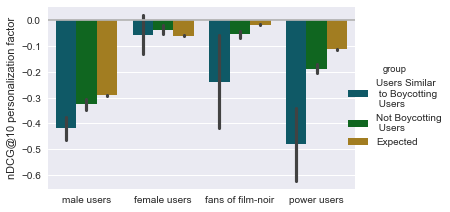

In [996]:

df1 = half_users(gender_boycotts)
df2 = half_users(genre_boycotts)
df3 = half_users(power_boycotts)
#df4 = all_users_all_ratings(occupation_boycotts)

grid, (total, total_sig, total_less, total_more, total_lbless), ntd = plot2(
    pd.concat([df1[
        #(df1.name.str.contains('female')) & 
        (df1.algo_name == 'SVD')],
        df2[(df2.name.str.contains('film-noir')) & (df2.algo_name == 'SVD')],
        df3[(df3.name.str.contains('power')) & (df3.algo_name == 'SVD')]
    
    ]),
    metrics=['ndcg10'],
    percents=True,
    groups=['non-boycott', 'like-boycott', 'expected'],
    size=3.5,
    kind='bar',
    flip=True,
    filename='h1.svg', save=True,
    palette=palette,
    aspect=1.5
)

# grid, (total, total_sig, total_less, total_more) = plot2(
#     df2[(df2.name.str.contains('Film-Noir')) & (df2.algo_name == 'SVD')],
#     metrics=['ndcg10'],
#     percents=True,
#     groups=['non-boycott', 'expected', 'like-boycott',],
#     size=2.5,
#     kind='bar',
#     flip=True,
#     filename='h2.svg', save=True,
#     palette=palette
# )

# grid, (total, total_sig, total_less, total_more) = plot2(
#     df3[(df3.name.str.contains('power')) & (df3.algo_name == 'SVD')],
#     metrics=['ndcg10'],
#     percents=True,
#     groups=['non-boycott', 'expected', 'like-boycott',],
#     size=2.5,
#     kind='bar',
#     flip=True,
#     filename='h3.svg', save=True,
#     palette=palette
# )




plt.show()


## Let's do gender first...

In [1004]:
124734.0*2 / NUM_RATINGS

0.24941587208273472

len of df 40
female users
124734.0
-0.059993512414410935
male users
375947.55
-0.29115748811954834


C:\Users\Nick\Anaconda3\lib\site-packages\seaborn\categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


ndcg10 SVD female users, percent_increase_ndcg10_expected, percent_increase_ndcg10_non-boycott
Ratio: 0.6160046559005126, pval: 0.013040910971429799
percent_increase_ndcg10_like-boycott
lb info -0.018481621472703734 -0.05544490753163141 -0.03696328605892767
ndcg10 SVD male users, percent_increase_ndcg10_expected, percent_increase_ndcg10_non-boycott
Ratio: 1.1214421607655032, pval: 0.01065906164058103
percent_increase_ndcg10_like-boycott
lb info -0.09246718700146117 -0.4190639421654413 -0.3265967551639801
Totals:
2 lbless, 2 sig, 1 less, and 1 more out of 2 total
total2 2 2
[-0.018481621472703734, -0.09246718700146117]


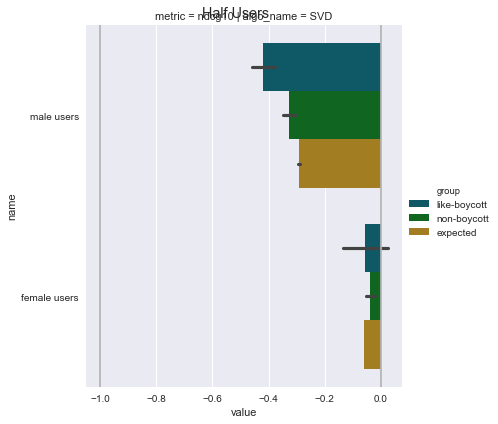

In [997]:
(total, total_sig, total_less, total_more, total_lbless), ntd = plot_all_three_scenarios(gender_boycotts)
running_totals['total'] += total
running_totals['total_sig'] += total_sig
running_totals['total_less'] += total_less
running_totals['total_more'] += total_more
running_totals['total_lbless'] += total_lbless
lbdiffs += ntd['lb']
diffs += ntd['nb']
print(diffs)
plt.show()

# Power Boycotts

Below, the power boycotts show a very weird results. Warrants double checks.

len of df 40
power users
190338.05
-0.11302769985665324
bottom 10% contributors
7213.2
0.016894784522087643


C:\Users\Nick\Anaconda3\lib\site-packages\seaborn\categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


ndcg10 SVD power users, percent_increase_ndcg10_expected, percent_increase_ndcg10_non-boycott
Ratio: 1.6748878353682681, pval: 1.2790282191657302e-07
percent_increase_ndcg10_like-boycott
lb info -0.28887224849680154 -0.4781868632007346 -0.18931461470393307
ndcg10 SVD bottom 10% contributors, percent_increase_ndcg10_expected, percent_increase_ndcg10_non-boycott
Ratio: 4.106074007079791, pval: 1.4556953064024207e-07
percent_increase_ndcg10_like-boycott
lb info -1.8078085916799327 -1.7384373593330684 0.06937123234686426
Totals:
2 lbless, 2 sig, 1 less, and 1 more out of 2 total
total2 2 2


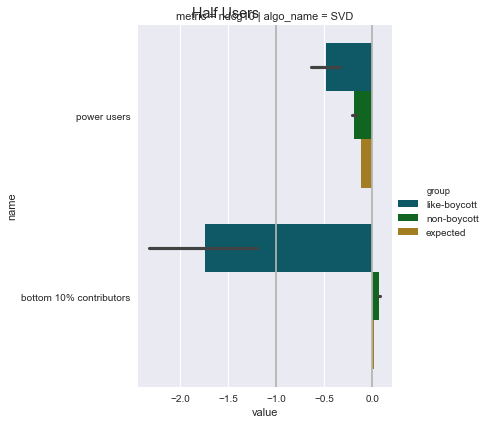

In [998]:
(total, total_sig, total_less, total_more, total_lbless), ntd = plot_all_three_scenarios(power_boycotts)
running_totals['total'] += total
running_totals['total_sig'] += total_sig
running_totals['total_less'] += total_less
running_totals['total_more'] += total_more
running_totals['total_lbless'] += total_lbless
lbdiffs += ntd['lb']
diffs += ntd['nb']


plt.show()

len of df 140
50-55
36205.35
0.0002670488847310434
25-34
198664.2
-0.12004309077818827
under 18
13785.2
0.013259936018357366
56+
19843.45
0.009839458617814266
35-44
99619.1
-0.0414457702732811
18-24
91701.25
-0.035836815463781986
45-49
41306.85
-0.002817392761531658


C:\Users\Nick\Anaconda3\lib\site-packages\seaborn\categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


ndcg10 SVD 50-55, percent_increase_ndcg10_expected, percent_increase_ndcg10_non-boycott
Ratio: 8.840861645242331, pval: 0.7651921426667849
percent_increase_ndcg10_like-boycott
lb info 0.03725577605712509 0.03958658910548184 0.002330813048356751
ndcg10 SVD 25-34, percent_increase_ndcg10_expected, percent_increase_ndcg10_non-boycott
Ratio: 1.0073039006782603, pval: 0.9350582288553033
percent_increase_ndcg10_like-boycott
lb info -0.004790831924629119 -0.125718257427811 -0.12092742550318189
ndcg10 SVD under 18, percent_increase_ndcg10_expected, percent_increase_ndcg10_non-boycott
Ratio: 1.7524109824403697, pval: 0.1706909447908615
percent_increase_ndcg10_like-boycott
lb info -0.08670799380536948 -0.06347230086410763 0.02323569294126184
ndcg10 SVD 56+, percent_increase_ndcg10_expected, percent_increase_ndcg10_non-boycott
Ratio: 3.387121467921116, pval: 0.00011914575878212035
percent_increase_ndcg10_like-boycott
lb info 0.005600567202154502 0.038924118926873565 0.03332355172471906
ndcg10 SVD

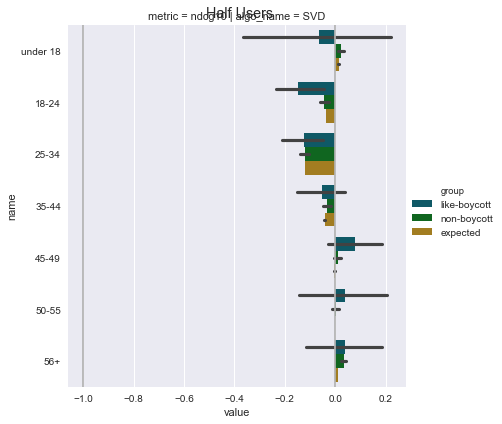

In [999]:
(total, total_sig, total_less, total_more, total_lbless), ntd = plot_all_three_scenarios(age_boycotts)
running_totals['total'] += total
running_totals['total_sig'] += total_sig
running_totals['total_less'] += total_less
running_totals['total_more'] += total_more
running_totals['total_lbless'] += total_lbless
lbdiffs += ntd['lb']
diffs += ntd['nb']
print(diffs)


plt.show()


len of df 420
college/grad student
66676.0
-0.01886084657109758
customer service
10758.65
0.014943648275797502
homemaker
5604.3
0.017772634234005998
sales/marketing
24670.95
0.007065940522179754
self-employed
23266.25
0.007877359709629186
lawyer
9662.6
0.015549275894638611
farmer
1136.3
0.02018571019258739
technician/engineer
36898.3
-0.00014913314136535873
writer
30434.9
0.003698739956518131
tradesman/craftsman
5999.6
0.01755738769204081
other
65295.8
-0.017957816077948035
k-12 student
11371.7
0.01460394916313386
executive/managerial
52689.75
-0.009870765705463143
clerical/admin
15329.5
0.012394383523412406
artist
24724.9
0.007034704766803539
doctor/health care
18143.7
0.010805890020267672
retired
6891.25
0.01707082504122328
academic/educator
42088.6
-0.003294244197564968
unemployed
7810.05
0.016567930109109882
scientist
11196.6
0.014701044316170423
programmer
28882.55
0.004611557896126304


C:\Users\Nick\Anaconda3\lib\site-packages\seaborn\categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


ndcg10 SVD college/grad student, percent_increase_ndcg10_expected, percent_increase_ndcg10_non-boycott
Ratio: 0.709997102752691, pval: 0.5356965995414043
percent_increase_ndcg10_like-boycott
lb info 0.0300178843784039 0.016623928613049305 -0.013393955765354593
ndcg10 SVD customer service, percent_increase_ndcg10_expected, percent_increase_ndcg10_non-boycott
Ratio: 1.9643028471175035, pval: 0.11612182214875132
percent_increase_ndcg10_like-boycott
lb info 0.12973816906022584 0.1590882244911684 0.029350055430942566
ndcg10 SVD homemaker, percent_increase_ndcg10_expected, percent_increase_ndcg10_non-boycott
Ratio: 2.384947193782035, pval: 0.02889758785135035
percent_increase_ndcg10_like-boycott
lb info 0.06710552661632299 0.10949153081197541 0.042386004195652416
ndcg10 SVD sales/marketing, percent_increase_ndcg10_expected, percent_increase_ndcg10_non-boycott
Ratio: 2.509366020288633, pval: 0.286210474564199
percent_increase_ndcg10_like-boycott
lb info 0.11170746685889991 0.12943180742235919

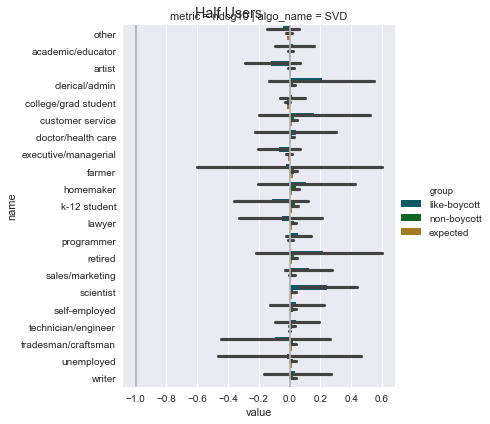

In [1000]:
(total, total_sig, total_less, total_more, total_lbless), ntd = plot_all_three_scenarios(occupation_boycotts)
running_totals['total'] += total
running_totals['total_sig'] += total_sig
running_totals['total_less'] += total_less
running_totals['total_more'] += total_more
running_totals['total_lbless'] += total_lbless
lbdiffs += ntd['lb']
diffs += ntd['nb']


plt.show()

len of df 360
fans of romance
75700.25
-0.0248508069103006
fans of musical
60833.5
-0.015062017828876392
fans of crime
88663.9
-0.03371551845268055
fans of fantasy
22876.25
0.00810200335563384
fans of drama
142555.85
-0.07385300371253792
fans of mystery
53860.55
-0.010609650353264753
fans of documentary
21881.2
0.008673904714887569
fans of horror
24414.75
0.007214201716090296
fans of thriller
82779.25
-0.029653532217800316
fans of animation
61326.65
-0.01538026137332319
fans of sci-fi
50312.6
-0.008378251802294298
fans of war
134025.7
-0.06714709979604282
fans of film-noir
63147.6
-0.016559214068952215
fans of adventure
51318.9
-0.00900880791876564
fans of children's
42879.55
-0.003777841752838483
fans of comedy
75372.6
-0.024630726729872515
fans of western
26131.95
0.006218182036130163
fans of action
62644.1
-0.016232624025317752


C:\Users\Nick\Anaconda3\lib\site-packages\seaborn\categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


ndcg10 SVD fans of romance, percent_increase_ndcg10_expected, percent_increase_ndcg10_non-boycott
Ratio: 0.781235153361706, pval: 0.500003630725431
percent_increase_ndcg10_like-boycott
lb info -0.15113198044458626 -0.1705500795940043 -0.019418099149418062
ndcg10 SVD fans of musical, percent_increase_ndcg10_expected, percent_increase_ndcg10_non-boycott
Ratio: 2.062620538579899, pval: 0.06482592603844163
percent_increase_ndcg10_like-boycott
lb info 0.010786244120504489 -0.020293853169162795 -0.031080097289667284
ndcg10 SVD fans of crime, percent_increase_ndcg10_expected, percent_increase_ndcg10_non-boycott
Ratio: 1.3251929556477884, pval: 0.19835525474418303
percent_increase_ndcg10_like-boycott
lb info -0.06613023951116533 -0.11081593388307634 -0.044685694371911014
ndcg10 SVD fans of fantasy, percent_increase_ndcg10_expected, percent_increase_ndcg10_non-boycott
Ratio: 0.8709068328702114, pval: 0.8692737271116326
percent_increase_ndcg10_like-boycott
lb info -0.07929095994879079 -0.0722360

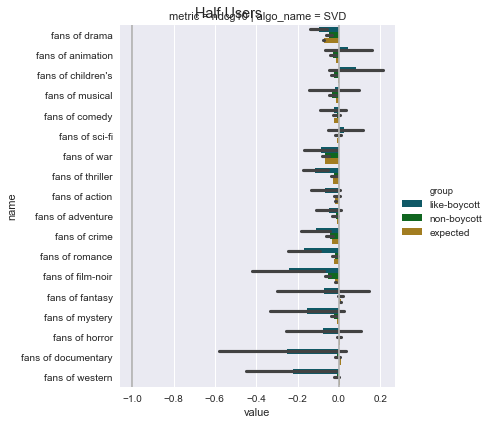

In [1001]:
(total, total_sig, total_less, total_more, total_lbless), ntd = plot_all_three_scenarios(genre_boycotts)
running_totals['total'] += total
running_totals['total_sig'] += total_sig
running_totals['total_less'] += total_less
running_totals['total_more'] += total_more
running_totals['total_lbless'] += total_lbless
lbdiffs.append(ntd['lb'])
diffs.append(ntd['nb'])

plt.show()

In [1006]:
63147.6 *2 / NUM_RATINGS

0.12626880981874788

In [1002]:
running_totals

{'total': 50,
 'total_lbless': 30,
 'total_less': 35,
 'total_more': 15,
 'total_sig': 50}

In [1003]:
print(np.mean(lbdiffs), np.mean(diffs))

ValueError: setting an array element with a sequence.